In [ ]:
from google.colab import files
uploaded=files.upload()

Saving loan.csv to loan (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# EDA(Exploratory Data Analysis)
# ->Checking for null values and duplicate values.
# ->Checking for outliers
# ->Label encoding

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
col=list(df.columns)
col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:
for i in col:
  if df[i].dtype != 'object':
    df[i]=df[i].fillna(df[i].mean())
  else:
    mode_val = df[i].mode()
    if not mode_val.empty:
        df[i] = df[i].fillna(mode_val[0])
    else:
        df[i] = df[i].fillna("Unknown")


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.duplicated().sum()

np.int64(0)

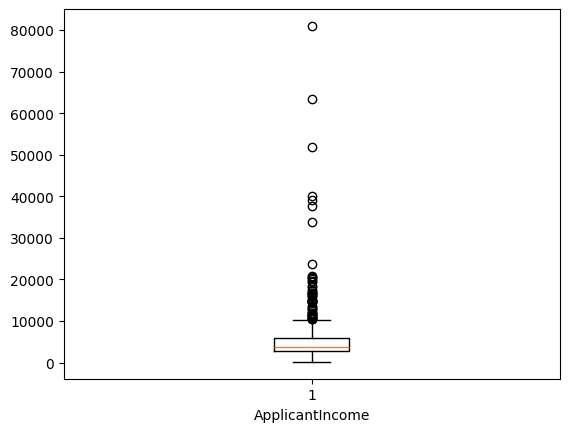

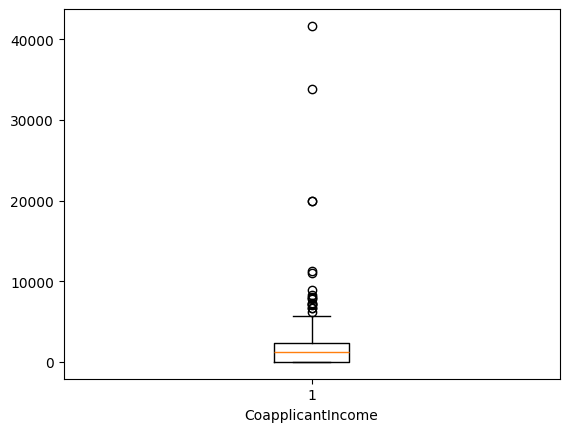

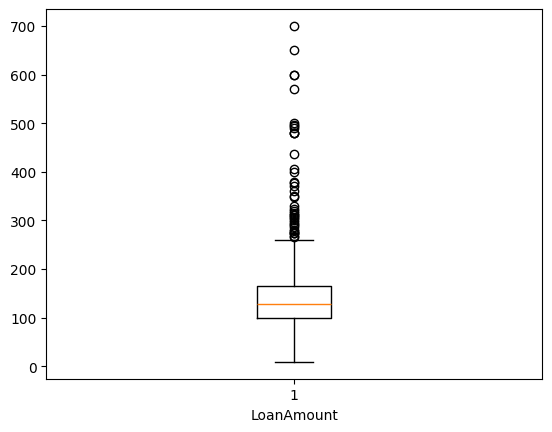

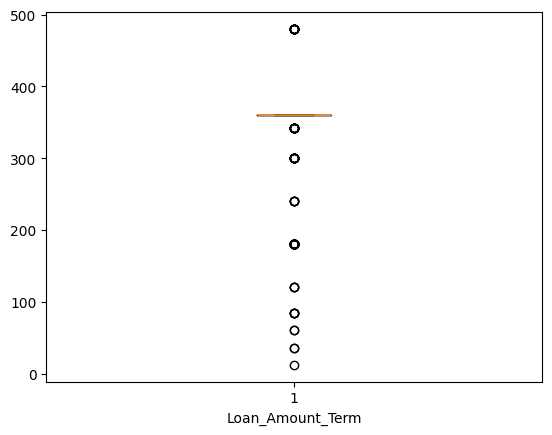

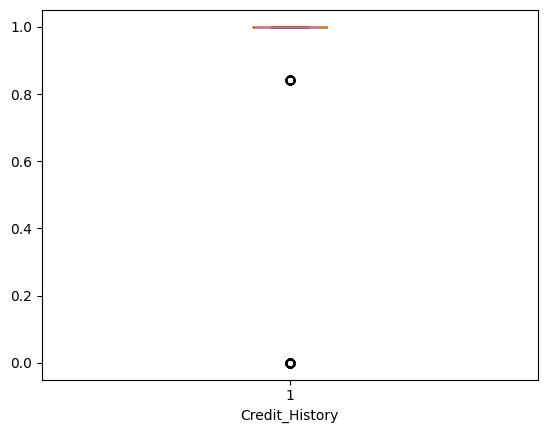

In [ ]:
for i in col:
  if df[i].dtype != 'object':
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()


In [ ]:
for i in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
  if df[i].dtype != 'object':
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df=df[(df[i] >= lower_bound)&(df[i] <= upper_bound)]

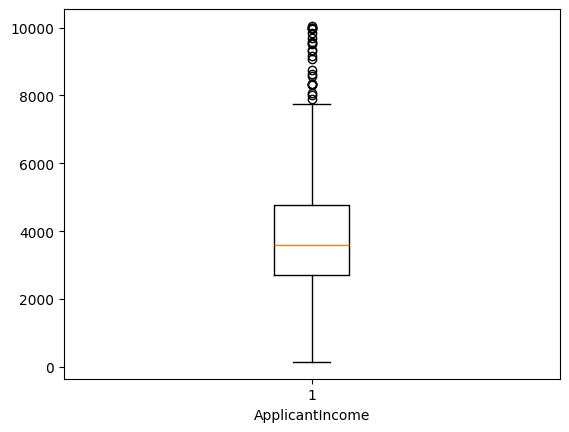

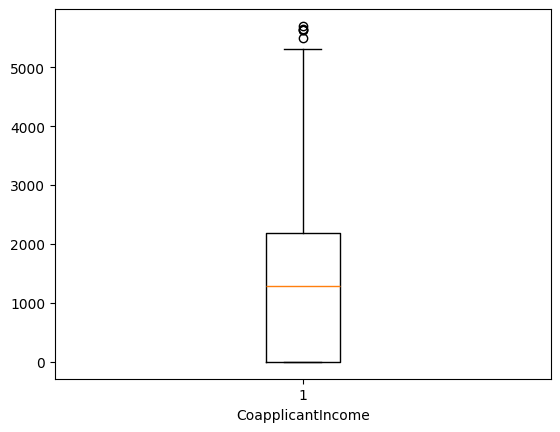

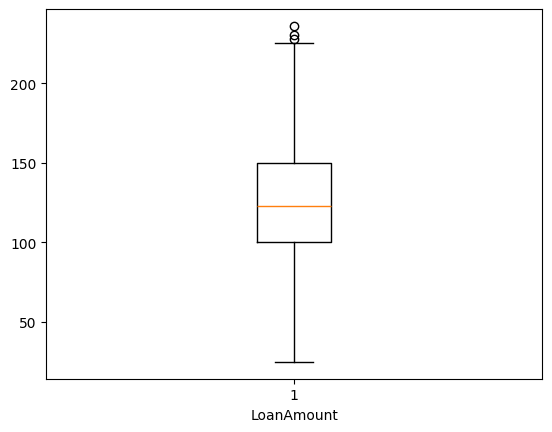

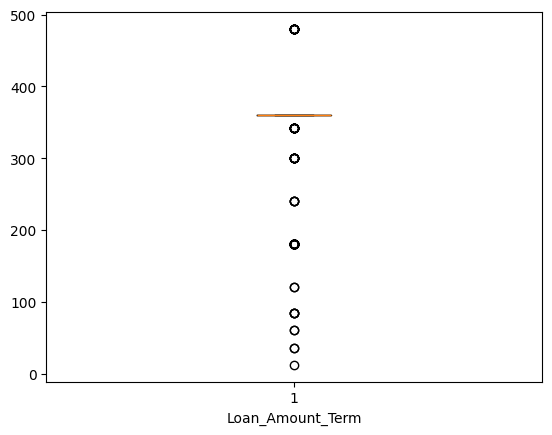

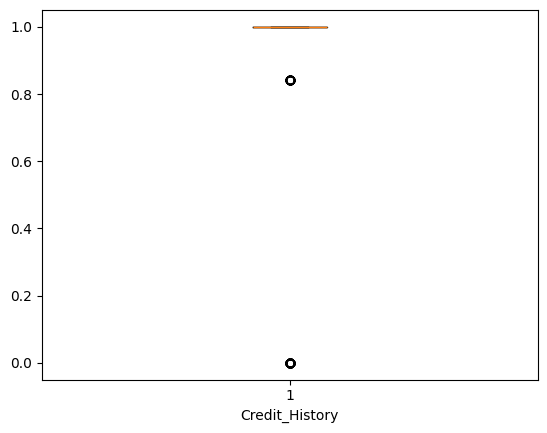

In [ ]:
for i in col:
  if df[i].dtype != 'object':
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df.drop(columns=['Loan_ID'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
y = df['Loan_Status'].map({"Y": 1, "N": 0})  # convert to 0/1
X = df.drop(columns=['Loan_Status'])

In [ ]:
y.value_counts()

,count
Loan_Status,
1,362
0,158


In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
608,1
609,1
610,1
612,1


In [ ]:
X.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [ ]:
# Feature Extraction
X['Total_Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']

In [ ]:
X['Loan_to_Income_ratio'] = X['LoanAmount'] / X['Total_Income'].replace(0,np.nan)
EMI = X["LoanAmount"]/X["Loan_Amount_Term"].replace(0, np.nan)
X['EMI_to_Income_ratio'] = EMI/X['Total_Income'].replace(0,np.nan)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_to_Income_ratio,EMI_to_Income_ratio
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,5849.0,0.025032,0.000070
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,0.021015,0.000058
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,0.022000,0.000061
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,0.024287,0.000067
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,0.023500,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,5182.0,0.020841,0.000058
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,2900.0,0.024483,0.000068
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,4106.0,0.009742,0.000054
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,7583.0,0.024660,0.000069


In [ ]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_Income',
 'Loan_to_Income_ratio',
 'EMI_to_Income_ratio']

In [ ]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
numeric_imputer = SimpleImputer(strategy="median")
categorical_imputer = SimpleImputer(strategy="most_frequent")

X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

In [ ]:
binary_cols = []
for col in categorical_cols:
    uniques = X[col].nunique()
    if uniques == 2:
        binary_cols.append(col)

In [ ]:
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [ ]:
categorical_cols = [c for c in categorical_cols if c not in binary_cols]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                520 non-null    int64  
 1   Married               520 non-null    int64  
 2   Dependents            520 non-null    object 
 3   Education             520 non-null    int64  
 4   Self_Employed         520 non-null    int64  
 5   ApplicantIncome       520 non-null    float64
 6   CoapplicantIncome     520 non-null    float64
 7   LoanAmount            520 non-null    float64
 8   Loan_Amount_Term      520 non-null    float64
 9   Credit_History        520 non-null    float64
 10  Property_Area         520 non-null    object 
 11  Total_Income          520 non-null    float64
 12  Loan_to_Income_ratio  520 non-null    float64
 13  EMI_to_Income_ratio   520 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 60.9+ KB


In [ ]:
categorical_cols

['Dependents', 'Property_Area']

In [ ]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
mi_scores = mutual_info_classif(X_train[numeric_cols + binary_cols], y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_cols + binary_cols).sort_values(ascending=False)
print("Mutual Information scores:")
print(mi_series)
top_k = 10
top_features = mi_series.head(top_k).index.tolist()
print("Top features by MI:", top_features)

Mutual Information scores:
Credit_History          0.173760
ApplicantIncome         0.047246
Loan_to_Income_ratio    0.021460
Total_Income            0.020918
Gender                  0.019379
Married                 0.012191
CoapplicantIncome       0.000000
LoanAmount              0.000000
Loan_Amount_Term        0.000000
EMI_to_Income_ratio     0.000000
Education               0.000000
Self_Employed           0.000000
dtype: float64
Top features by MI: ['Credit_History', 'ApplicantIncome', 'Loan_to_Income_ratio', 'Total_Income', 'Gender', 'Married', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'EMI_to_Income_ratio']


In [ ]:
numeric_for_model = list(set(numeric_cols + binary_cols))
categorical_for_model = categorical_cols  # remaining categoricals
numeric_transformer_std = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])
numeric_transformer_mm = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor_std = ColumnTransformer(transformers=[("num", numeric_transformer_std, numeric_for_model),("cat", categorical_transformer, categorical_for_model)])
preprocessor_mm = ColumnTransformer(transformers=[("num", numeric_transformer_mm, numeric_for_model),("cat", categorical_transformer, categorical_for_model)])

In [ ]:
#Logistic regression

In [ ]:
log_reg=Pipeline(steps=[('preprocessor',preprocessor_std),('model_classifier',LogisticRegression())])
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
y_pred_prob=log_reg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.02521052, 0.80521763, 0.91699507, 0.91142828, 0.7566951 ,
       0.91039029, 0.7654854 , 0.0881997 , 0.76737902, 0.15856276,
       0.8763232 , 0.79062725, 0.53424825, 0.94230995, 0.85806827,
       0.80023347, 0.89618642, 0.85379623, 0.89844655, 0.891508  ,
       0.9435407 , 0.0750766 , 0.45813992, 0.80787174, 0.66448207,
       0.84154237, 0.74082172, 0.90871595, 0.02793481, 0.83897352,
       0.75030683, 0.77318635, 0.88384568, 0.90148936, 0.95536781,
       0.11562173, 0.82342508, 0.86729865, 0.79944992, 0.02927407,
       0.89156752, 0.82470573, 0.56253855, 0.19553894, 0.85757601,
       0.73723893, 0.79417986, 0.92127998, 0.72373127, 0.89145198,
       0.9380245 , 0.94832785, 0.71002295, 0.84689235, 0.0522826 ,
       0.65947411, 0.83132761, 0.86869492, 0.87496425, 0.03332222,
       0.81614837, 0.89358907, 0.93443168, 0.79119267, 0.74705081,
       0.7505145 , 0.7993872 , 0.1362694 , 0.87083538, 0.77330189,
       0.86653485, 0.69794341, 0.05579691, 0.9052006 , 0.90623

In [ ]:
y_pred_tr =log_reg.predict(X_train)
y_proba_tr =log_reg.predict_proba(X_train)[:, 1]

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64        32
           1       0.82      0.94      0.88        72

    accuracy                           0.82       104
   macro avg       0.81      0.74      0.76       104
weighted avg       0.82      0.82      0.80       104



In [ ]:
acc = accuracy_score(y_test, y_pred)
acc_tr=accuracy_score(y_train,y_pred_tr)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_pred_prob)

In [ ]:
print(acc)
print(acc_tr)
print(prec)
print(rec)
print(f1)
print(auc)

0.8173076923076923
0.8269230769230769
0.8192771084337349
0.9444444444444444
0.8774193548387097
0.810763888888889


In [ ]:
# Random Forest Classifier

In [ ]:
from random import Random
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n=[100,150,200,250,300,400,500,600,700,800,900,1000]
ac=[]
for i in n:
   r_forest= Pipeline(steps=[("preprocess", preprocessor_mm),("model", RandomForestClassifier(n_estimators=i))])
   r_forest.fit(X_train, y_train)
   y_pred_rf = r_forest.predict(X_test)
   y_proba_rf = r_forest.predict_proba(X_test)[:, 1]
   a=accuracy_score(y_test,y_pred_rf)*100
   ac.append(a)

In [ ]:
ac

[84.61538461538461,
 82.6923076923077,
 83.65384615384616,
 84.61538461538461,
 82.6923076923077,
 82.6923076923077,
 82.6923076923077,
 84.61538461538461,
 82.6923076923077,
 84.61538461538461,
 82.6923076923077,
 83.65384615384616]

In [ ]:
d={'Number of trees':n,'Accuracy':ac}
rf=pd.DataFrame(d)
rf

,Number of trees,Accuracy
0,100,84.615385
1,150,82.692308
2,200,83.653846
3,250,84.615385
4,300,82.692308
5,400,82.692308
6,500,82.692308
7,600,84.615385
8,700,82.692308
9,800,84.615385


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'clf__n_estimators':[100,200,300],'clf__max_depth':[None,5,10],'clf__min_samples_split':[2,5,10],'clf__min_samples_leaf':[1,2,4],'clf__criterion':['gini','entropy']}

In [ ]:
random_forest=Pipeline(steps=[("preprocess", preprocessor_mm),("clf", RandomForestClassifier(random_state=0))])
grid_search = GridSearchCV(estimator=random_forest,param_grid=param_grid,cv=3,scoring="roc_auc",n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'Loan_Amount_Term',
                                                                          'Education',
                                                                          'Loan_to_Income_ratio',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'LoanAmount',
                                                                          'EMI_to_Income_ratio',
                                                                          'Total_Income',
                                                                          'Gender'...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Dependents',
                                                                          'Property_Area'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 5, 10],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

Best params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Best CV AUC: 0.7842023264059347


In [ ]:
y_pred_rf=best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_proba_test)
print("Test AUC:", test_auc)

y_pred_tr =best_model.predict(X_train)
y_proba_tr =best_model.predict_proba(X_train)[:, 1]


Test AUC: 0.794704861111111


In [ ]:
acc = accuracy_score(y_test, y_pred_rf)
acc_tr=accuracy_score(y_train,best_model.predict(X_train))
prec = precision_score(y_test, y_pred_rf, zero_division=0)
rec = recall_score(y_test, y_pred_rf, zero_division=0)
f1 = f1_score(y_test, y_pred_rf, zero_division=0)
auc = roc_auc_score(y_test, y_proba_test)

In [ ]:
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {auc:.4f}")

Accuracy:  0.8462
Precision: 0.8333
Recall:    0.9722
F1-Score:  0.8974
ROC-AUC:   0.7947


In [ ]:
train_m = accuracy_score(y_train, y_pred_tr)
test_m = accuracy_score(y_test, y_pred)

In [ ]:
print(train_m,test_m)

0.9615384615384616 0.8173076923076923


In [ ]:
import pickle
# 1) Final feature list in the correct order
feature_columns = list(X.columns)
# 2) Save both pipelines and the feature list
with open("model_log.pkl", "wb") as f:
    pickle.dump(log_reg, f)
with open("model_rf.pkl", "wb") as f:
    pickle.dump(random_forest, f)
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


In [ ]:
!pip install streamlit pyngrok scikit-learn pandas numpy

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle
# Load fitted logistic regression pipeline
with open("model_log.pkl", "rb") as f:
    model_log = pickle.load(f)
# Column order & names from X.info()
TRAIN_COLUMNS = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
    "Property_Area",
    "Total_Income",
    "Loan_to_Income_ratio",
    "EMI_to_Income_ratio"]

# Helper: build input row
def make_input_df(
    Gender,
    Married,
    Dependents,
    Education,
    Self_Employed,
    ApplicantIncome,
    CoapplicantIncome,
    LoanAmount,
    Loan_Amount_Term,
    Credit_History,
    Property_Area):
    Total_Income = ApplicantIncome + CoapplicantIncome
    Loan_to_Income_ratio = LoanAmount / Total_Income if Total_Income != 0 else 0
    EMI_to_Income_ratio = (LoanAmount / Loan_Amount_Term / Total_Income
        if (Loan_Amount_Term != 0 and Total_Income != 0)
        else 0)

    row = {"Gender": Gender,
        "Married": Married,
        "Dependents": Dependents,
        "Education": Education,
        "Self_Employed": Self_Employed,
        "ApplicantIncome": ApplicantIncome,
        "CoapplicantIncome": CoapplicantIncome,
        "LoanAmount": LoanAmount,
        "Loan_Amount_Term": Loan_Amount_Term,
        "Credit_History": Credit_History,
        "Property_Area": Property_Area,
        "Total_Income": Total_Income,
        "Loan_to_Income_ratio": Loan_to_Income_ratio,
        "EMI_to_Income_ratio": EMI_to_Income_ratio}
    df = pd.DataFrame([row])
    df = df[TRAIN_COLUMNS]
    return df

# Streamlit UI
st.title("Loan Prediction (Logistic Regression)")
with st.expander("Model & preprocessing details"):
    st.write("- Model: Logistic Regression with preprocessing pipeline from the notebook.[file:120]")
    st.write("- Numeric: Education, Total_Income, ApplicantIncome, Credit_History, Loan_Amount_Term, Loan_to_Income_ratio, LoanAmount, Self_Employed, Married, EMI_to_Income_ratio, CoapplicantIncome, Gender (median imputation + MinMaxScaler).[file:120]")
    st.write("- Categorical: Dependents, Property_Area (most frequent imputation + one‑hot encoding).[file:120]")
st.header("Applicant Details")

col1, col2 = st.columns(2)
with col1:
    Gender = st.selectbox("Gender", ["Male", "Female"])
    Married = st.selectbox("Married", ["Yes", "No"])
    Dependents = st.selectbox("Dependents", ["0", "1", "2", "3+"])
    Education = st.selectbox("Education", ["Graduate", "Not Graduate"])
    Self_Employed = st.selectbox("Self Employed", ["Yes", "No"])
    Property_Area = st.selectbox("Property Area", ["Urban", "Semiurban", "Rural"])

with col2:
    ApplicantIncome = st.number_input("Applicant Income", min_value=0.0, value=5000.0)
    CoapplicantIncome = st.number_input("Coapplicant Income", min_value=0.0, value=0.0)
    LoanAmount = st.number_input("Loan Amount", min_value=0.0, value=100.0)
    Loan_Amount_Term = st.number_input("Loan Amount Term (months)", min_value=1.0, value=360.0)
    Credit_History = st.selectbox("Credit History", [1.0, 0.0])



# Prediction with business rules
if st.button("Predict"):
    # Encode categoricals to match training dtypes in X.info()
    gender_map = {"Male": 1, "Female": 0}
    married_map = {"Yes": 1, "No": 0}
    education_map = {"Graduate": 1, "Not Graduate": 0}
    self_emp_map = {"Yes": 1, "No": 0}
    Gender_enc = gender_map[Gender]
    Married_enc = married_map[Married]
    Education_enc = education_map[Education]
    Self_Employed_enc = self_emp_map[Self_Employed]

    Total_Income = ApplicantIncome + CoapplicantIncome
    Loan_to_Income_ratio = (LoanAmount / Total_Income if Total_Income != 0 else float("inf"))

    # 1) Auto-reject if no income
    if Total_Income == 0:
        st.error("Loan Not Approved (Total income is 0).")
    # 2) Auto-reject if loan too high vs income
    elif Loan_to_Income_ratio > 5:
        st.error("Loan Not Approved (Loan amount too high compared to income).")
    # 3) Auto-approve if reasonable ratio and good credit
    elif Loan_to_Income_ratio <= 2 and Credit_History == 1.0:
        st.success("Loan Approved (reasonable loan amount vs income and good credit).")
    # 4) Otherwise, use the model
    else:
        input_df = make_input_df(Gender_enc,
            Married_enc,
            Dependents,
            Education_enc,
            Self_Employed_enc,
            ApplicantIncome,
            CoapplicantIncome,
            LoanAmount,
            Loan_Amount_Term,
            Credit_History,
            Property_Area,)

        pred = model_log.predict(input_df)[0]
        prob = (model_log.predict_proba(input_df)[0][1]
            if hasattr(model_log, "predict_proba")
            else None)

        if pred == 1:
            st.success(f"Loan Approved (class 1){'' if prob is None else f' — probability {prob:.2f}'}")
        else:
            st.error(f"Loan Not Approved (class 0){'' if prob is None else f' — probability {prob:.2f}'}")

Overwriting app.py


In [ ]:
with open("model_log.pkl", "wb") as f:
    pickle.dump(log_reg, f)

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("3A3ceNWf1pYmPYujg9C2ULXbjDd_7YEiWeVmnn1PMWZfKgZZK")

In [ ]:
from pyngrok import ngrok
import subprocess

ngrok.kill()
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

public_url = ngrok.connect(8501, "http")
public_url

<NgrokTunnel: "https://hydrocephaloid-lahoma-extramural.ngrok-free.dev" -> "http://localhost:8501">